## 🔹 Static Prompt

  - A static prompt is fixed — it never changes regardless of input or context.

  - You write the instruction once, and it’s always the same.

📌 Example (static):

```bash
Translate this sentence into French: "How are you?"
```

No matter when or where you run it, the model always gets that exact text.

## 🔹 Dynamic Prompt

 - A dynamic prompt changes based on variables, user input, or external data.

 - You create a template and then fill in the blanks programmatically.

📌 Example (dynamic with template):

```bash

from langchain.prompts import PromptTemplate

template = "Translate this sentence into {language}: \"{sentence}\""
prompt = PromptTemplate.from_template(template)

print(prompt.format(language="Spanish", sentence="How are you?"))
```

➡️ Output prompt becomes:

```bash
Translate this sentence into Spanish: "How are you?"
```

If tomorrow you pass language="German", the prompt changes automatically.

🔑 Difference in simple words

  - Static prompt = fixed text (good for simple, one-off tasks).

  - Dynamic prompt = flexible, uses variables to adapt to different inputs (good for apps, chatbots, automation).

## 🔹 PromptTemplate

A PromptTemplate in LangChain is a structured way to create prompts dynamically by inserting variables into a predefined template. Instead of hadcoding prompts, 

PromptTemplate allows you to define placeholders that can be filled in a runtime with different inputs.

this makes it reusable, flexible, and easy to manage, especially when working with dynamic user input or auto mated workflows.

```bash
template = ("Here is a summary of a research paper on {paper_topic} "
            "in a {response_style} style with {response_length} length.")

```

Why use PromptTemplate over f strings?

1. Default validation
2. Reusable
3. LangChain Ecosystem

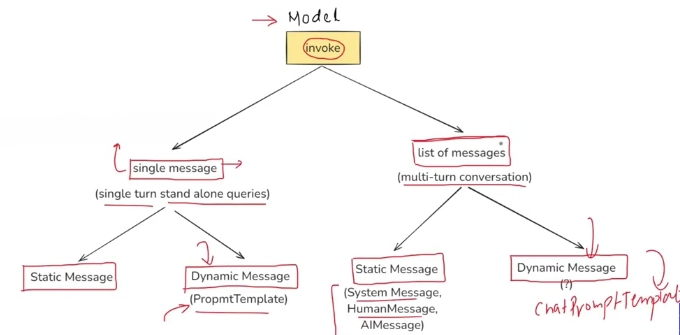

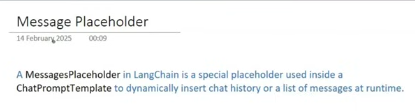

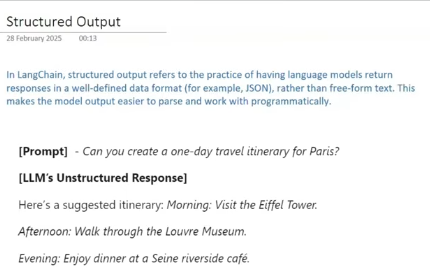
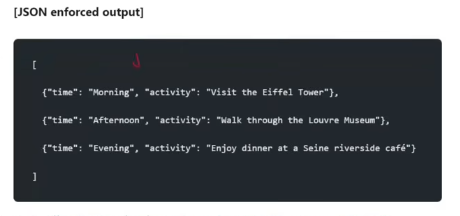

### We can specify data format for those LLMs who can generate by default structured output:

1. TypedDict
2. Pydantic  (we will always work with Pydantic)
3. json_schema

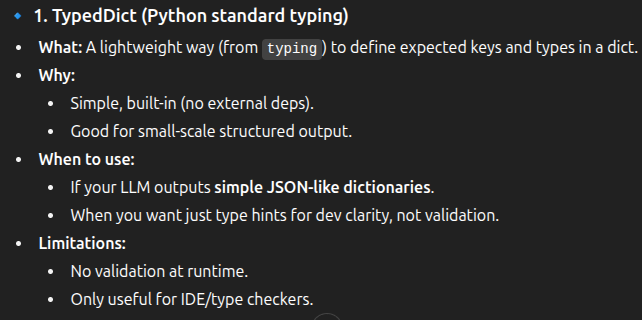

```bash
from typing import TypedDict

class Quiz(TypedDict):
    question: str
    options: list[str]
    answer: str
```
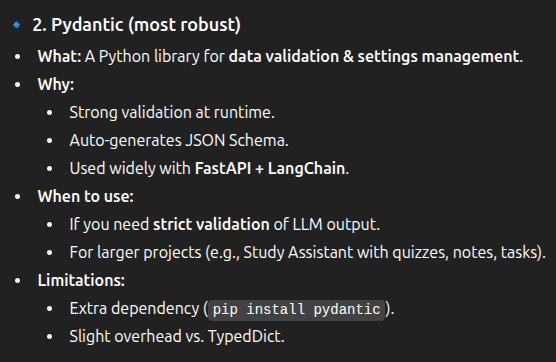

```bash
from pydantic import BaseModel
from typing import List

class Quiz(BaseModel):
    question: str
    options: List[str]
    answer: str
```
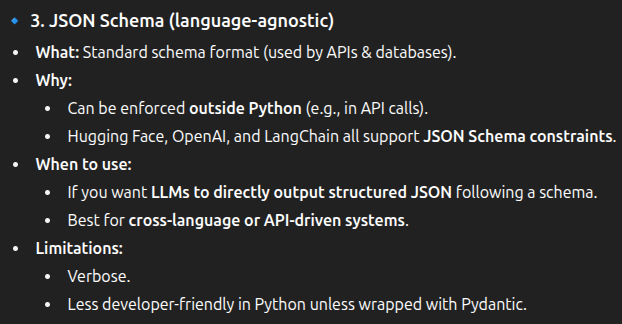

```bash
quiz_schema = {
  "type": "object",
  "properties": {
    "question": {"type": "string"},
    "options": {"type": "array", "items": {"type": "string"}},
    "answer": {"type": "string"}
  },
  "required": ["question", "options", "answer"]
}
```

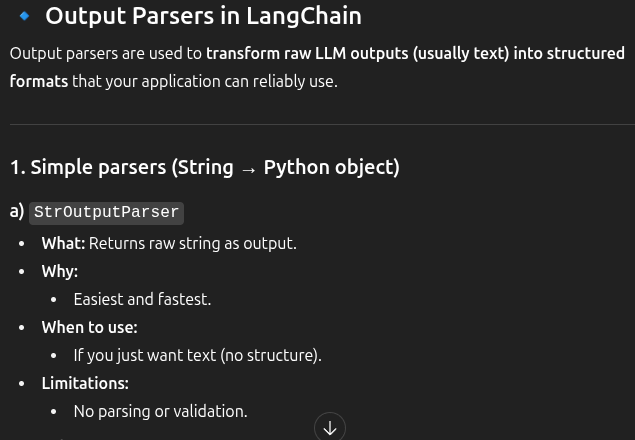

```bash
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()
result = parser.parse("Hello World")
print(result)  # "Hello World"

```

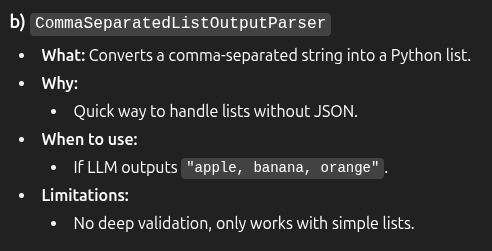

```bash
from langchain_core.output_parsers import CommaSeparatedListOutputParser

parser = CommaSeparatedListOutputParser()
result = parser.parse("apple, banana, orange")
print(result)  # ["apple", "banana", "orange"]

```

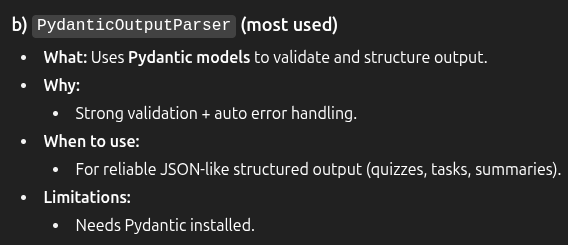

```bash
from pydantic import BaseModel
from langchain.output_parsers import PydanticOutputParser

class Quiz(BaseModel):
    question: str
    options: list[str]
    answer: str

parser = PydanticOutputParser(pydantic_object=Quiz)

text = '{"question": "What is AI?", "options": ["A", "B"], "answer": "A"}'
print(parser.parse(text))
# Quiz(question='What is AI?', options=['A', 'B'], answer='A')

```

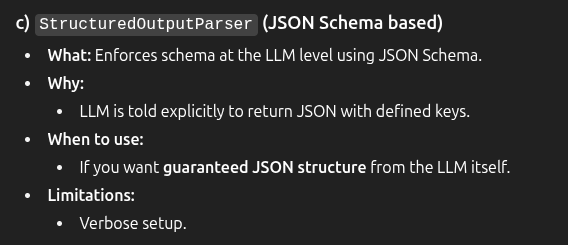

```bash
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

schemas = [
    ResponseSchema(name="question", description="The quiz question"),
    ResponseSchema(name="answer", description="The correct answer"),
]

parser = StructuredOutputParser.from_response_schemas(schemas)
print(parser.get_format_instructions())  # Pass to LLM prompt

```